@Date         : 24-11-2025

@Author       : Felipe Gutiérrez Carilao

@Affiliation  : Universidad Andrés Bello

@Email        : f.gutierrezcarilao@uandresbello.edu

@Module       : analysis

@File         : Procesamiento inicial.ipynb

In [1]:
# Librerias base
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

NOTAS:
- El "Giantsteps dataset" debe ser descargado desde https://zenodo.org/records/1101082 y crear una carpeta llamada "giantsteps-mtg-key-dataset"  dentro de la carpeta "audio"
- El "FSL10K dataset" debe ser descargado desde https://zenodo.org/records/3967852 y crear una carpeta llamada "fsl10k-dataset"  dentro de la carpeta "audio"
- El "MusicBench dataset" debe ser descargado desde https://huggingface.co/datasets/amaai-lab/MusicBench y crear una carpeta llamada "musicbench-dataset" dentro de la carpeta "audio"
- Se recomienda instalar todos las dependencias del proyecto desde el archivo requirements.txt

# Procesamiento inicial

Todos los datasets se normalizaron sus datos respecto a la siguiente norma:
- C:major/minor
- C#:major/minor
- D:major/minor
- D#:major/minor
- E:major/minor
- F:major/minor
- F#:major/minor
- G:major/minor
- G#:major/minor
- A:major/minor
- A#:major/minor
- B:major/minor

De esta manera se creará un dataset unificado donde todos los datos tendrán la etiqueta key en el mismo formato

### 1. Procesamiento Giantsteps

In [3]:
file_name = "..//audio//giantsteps-mtg-key-dataset//Beatport-EDM-Key-Dataset.xlsx" 
df = pd.read_excel(file_name)

print(df.columns)
print(df.shape)
print(df.head(10))

Index(['id', 'artists', 'title', 'mix', 'label', 'genres', 'main_key',
       'confidence', 'time1', 'change1', 'time2', 'change2', 'comments'],
      dtype='object')
(1486, 13)
      id                            artists             title  \
0   5061                Philippe Van Mullem            Canopy   
1   5881         Brainbashers, Lance Madden          Realness   
2   7217  Made By Monkeys, Salvatore, Focus             I Try   
3  10359           Oliver Klein, Ian Wilkie        RheinKraft   
4  10981                              Panic  Tasty Treat Beat   
5  11077                Billy Paul Williams       Winter Heat   
6  11194                        Alek Biotic       Funk Matter   
7  14344                       Oliver Prime   Velvet Sunshine   
8  14720      Willie Morales, Robbie Rivera  Bang To The Beat   
9  16484                        Kinder Atom         Slow Back   

                      mix                  label                   genres  \
0            Progress Mix    

In [4]:
"""
Eliminar claves incorrectas, esto incluye:
- Que tengan más de un valor (separado por |)
- Que contengan "other", "X" o "unknown"
"""
mask1 = df["main_key"].str.contains("\\|")
mask2 = df["main_key"].str.contains("other", case=False)
mask3 = df["main_key"].str.contains("X", case=False)
mask4 = df["main_key"].str.contains("unknown", case=False)
df = df[~(mask1 | mask2 | mask3 | mask4)]

print(df.shape)

(1293, 13)


In [5]:
"""
Existen algunos casos particulares donde la key aporta información de sobra, por ej:
F# major mixolydian
En este caso nos quedaremos solamente con
F# major
"""
df["main_key"] = df["main_key"].apply(
    lambda x: " ".join(x.split()[:2])
)

print(df.shape)

(1293, 13)


In [6]:
# Función que convierte una nota en bemol a su sostenido correspondiente
def convertir_a_sostenido(key):
    listado = {
        "Ab": "G#",
        "Bb": "A#",
        "Db": "C#",
        "Eb": "D#",
        "Gb": "F#"
    }

    key_original = key.split()
    key_nota = key_original[0]
    key_modo = key_original[1]
    
    if 'b' in key_nota:
        key_nota = listado.get(key_nota, key_nota)
    key_new = key_nota + ":" + key_modo

    return key_new

df['new_key'] = df['main_key'].apply(convertir_a_sostenido)
print(df.shape)

(1293, 14)


In [7]:
# Crear el nuevo DataFrame
df_new = pd.DataFrame({
    "dataset": "giantsteps",
    "file_directory": "audio",
    "file_name": df["id"].astype(str) + ".mp3",
    "key": df["new_key"],
    "duration": "120.0"
})

print(df_new.head(10))
print(df_new.shape)

       dataset file_directory  file_name       key duration
0   giantsteps          audio   5061.mp3  D#:minor    120.0
1   giantsteps          audio   5881.mp3   A:major    120.0
2   giantsteps          audio   7217.mp3   F:minor    120.0
3   giantsteps          audio  10359.mp3   D:minor    120.0
5   giantsteps          audio  11077.mp3   G:minor    120.0
6   giantsteps          audio  11194.mp3   D:minor    120.0
7   giantsteps          audio  14344.mp3   D:minor    120.0
8   giantsteps          audio  14720.mp3   D:minor    120.0
9   giantsteps          audio  16484.mp3   A:minor    120.0
10  giantsteps          audio  17025.mp3  D#:minor    120.0
(1293, 5)


In [ ]:
# Exportar df a csv
df_new.to_csv('..//annotations//giantsteps.csv', index=False)

### 2. Procesamiento FSL10K dataset

In [ ]:
file_name = "..//audio//fsl10k-dataset//ac_analysis//505_301_analysis.json"
with open(file_name, 'r') as archivo:
    data = json.load(archivo)
json_str = json.dumps(data)
print(json_str)

{"duration": 24.37444496154785, "lossless": 1.0, "codec": "pcm_s16le", "bitrate": 1411200.0, "samplerate": 44100.0, "channels": 2.0, "audio_md5": "f419ba3fa5bcaec8df9bfbc94eeb72a9", "loudness": -15.418365478515625, "dynamic_range": 6.160494804382324, "temporal_centroid": 0.49364912509918213, "log_attack_time": -1.2880302667617798, "filesize": 4299874, "single_event": false, "tonality": "C# minor", "tonality_confidence": 0.4230516254901886, "loop": false, "tempo": 79, "tempo_confidence": 0.6273423194885254, "note_midi": 34, "note_name": "A#1", "note_frequency": 57.03619384765625, "note_confidence": 0.35860490798950195, "genre": "Genre B", "mood": "Mood B"}


In [73]:
column_names=['file_directory','file_name','duration','key','tempo']
df = pd.DataFrame(columns=column_names)
print(df.columns)

Index(['file_directory', 'file_name', 'duration', 'key', 'tempo'], dtype='object')


In [ ]:
# Función que convierte una nota en bemol a su sostenido correspondiente
def convertir_a_sostenido(nota):
    listado = {
        "Ab": "G#",
        "Bb": "A#",
        "Db": "C#",
        "Eb": "D#",
        "Gb": "F#"
    }
    return listado.get(nota, nota)

# Construir el df con la localización de cada archivo
directorio = Path('./audio/fsl10k-dataset/audio/wav')

total=9486
index=0
for file in directorio.iterdir():
    if file.is_file():
        file_base_wav_name = file.name[:-8]
        file_base_aiff_name = file.name[:-9]
        is_wav = True
        file_notes_name = ""

        # probar formato extensión
        file_audio_name = file_base_wav_name + ".wav.wav"
        ruta = Path('./audio/fsl10k-dataset/audio/wav/' + file_audio_name)
        if not ruta.exists():
            is_wav = False
            file_audio_name = file_base_aiff_name + ".aiff.wav"
        
        # buscar anotaciones
        if is_wav is True:
            file_notes_name = file_base_wav_name + "_analysis.json"
        else:
            file_notes_name = file_base_aiff_name + "_analysis.json"
        ruta2 = Path('./audio/fsl10k-dataset/ac_analysis/' + file_notes_name)

        # buscar anotaciones
        file_directory_folder = "audio/wav"
        try:
            with open(ruta2, 'r') as archivo:
                data = json.load(archivo)
        except:
            file_directory_folder = None
        
        # convertir bemol a sostenido
        key_original = data["tonality"].split()
        key_nota = key_original[0]
        key_modo = key_original[1]
        if 'b' in key_nota:
            key_nota = convertir_a_sostenido(key_nota)
        key_new = key_nota + ":" + key_modo

        # construir dataset
        df.loc[int(index), 'file_directory'] = file_directory_folder
        df.loc[int(index), 'file_name'] = file_audio_name
        df.loc[int(index), 'duration'] = data["duration"]
        df.loc[int(index), 'key'] = key_new
        df.loc[int(index), 'tempo'] = data["tempo"]
    index+=1
    print(f"Progreso: {index}/{total} archivos procesados")

Progreso: 1/9486 archivos procesados
Progreso: 2/9486 archivos procesados
Progreso: 3/9486 archivos procesados
Progreso: 4/9486 archivos procesados
Progreso: 5/9486 archivos procesados
Progreso: 6/9486 archivos procesados
Progreso: 7/9486 archivos procesados
Progreso: 8/9486 archivos procesados
Progreso: 9/9486 archivos procesados
Progreso: 10/9486 archivos procesados
Progreso: 11/9486 archivos procesados
Progreso: 12/9486 archivos procesados
Progreso: 13/9486 archivos procesados
Progreso: 14/9486 archivos procesados
Progreso: 15/9486 archivos procesados
Progreso: 16/9486 archivos procesados
Progreso: 17/9486 archivos procesados
Progreso: 18/9486 archivos procesados
Progreso: 19/9486 archivos procesados
Progreso: 20/9486 archivos procesados
Progreso: 21/9486 archivos procesados
Progreso: 22/9486 archivos procesados
Progreso: 23/9486 archivos procesados
Progreso: 24/9486 archivos procesados
Progreso: 25/9486 archivos procesados
Progreso: 26/9486 archivos procesados
Progreso: 27/9486 arc

In [75]:
print(df.head(10))

  file_directory                file_name   duration       key tempo
0      audio/wav   100269_1676089.wav.wav   15.73771   G:major   122
1      audio/wav   100270_1676089.wav.wav   7.868844   F:minor   122
2      audio/wav    100793_949812.wav.wav   8.571438   C:minor   112
3      audio/wav    100900_949812.wav.wav   8.571438  G#:minor   112
4      audio/wav    100901_949812.wav.wav   8.571438  G#:minor   112
5      audio/wav    100902_949812.wav.wav   8.571438   C:minor   149
6      audio/wav  101121_1657645.aiff.wav       16.0   E:minor   120
7      audio/wav   101122_1657645.wav.wav   20.64517  F#:minor    93
8      audio/wav   101264_1569192.wav.wav       7.68  G#:major   125
9      audio/wav    101893_401166.wav.wav  14.769229  G#:minor   130


In [ ]:
# Exportar df a csv
df.to_csv('..//annotations//fsl10k.csv', index=False)

### 3. Procesamiento MusicBench dataset

In [ ]:
file_name = "..//audio//musicbench-dataset//annotations_train_modified.json"   # tu archivo con muchas filas como la que muestras
df = pd.read_json(file_name, lines=True)

print(df.columns)
print(df.shape)
print(df.head(10))

Index(['dataset', 'location', 'main_caption', 'alt_caption', 'prompt_aug',
       'prompt_ch', 'prompt_bt', 'prompt_bpm', 'prompt_key', 'beats', 'bpm',
       'chords', 'chords_time', 'key', 'keyprob', 'is_audioset_eval_mcaps'],
      dtype='object')
(52768, 16)
      dataset                      location  \
0  MusicBench   data_aug2/-0SdAVK79lg_1.wav   
1  MusicBench   data_aug2/-0SdAVK79lg_2.wav   
2  MusicBench   data_aug2/-0SdAVK79lg_3.wav   
3  MusicBench   data_aug2/-0SdAVK79lg_4.wav   
4  MusicBench   data_aug2/-0SdAVK79lg_5.wav   
5  MusicBench   data_aug2/-0SdAVK79lg_6.wav   
6  MusicBench   data_aug2/-0SdAVK79lg_7.wav   
7  MusicBench   data_aug2/-0SdAVK79lg_8.wav   
8  MusicBench   data_aug2/-0SdAVK79lg_9.wav   
9  MusicBench  data_aug2/-0SdAVK79lg_10.wav   

                                        main_caption  \
0  This mellow instrumental track showcases a dom...   
1  This relaxing song is perfect for a coffee sho...   
2  This laid-back instrumental track is perfect f..

In [3]:
# Crear columna "duration" sumando los valores de cada acorde de la columna "chords_time"
def sum_chords_time(chords_time_list):
    if not chords_time_list:  # por si hay listas vacías
        return 0.0
    return sum(chords_time_list)

df['duration'] = df['chords_time'].apply(sum_chords_time)

# Verificar resultados
print(df[['location', 'chords_time', 'duration']].head(10))

                       location            chords_time  duration
0   data_aug2/-0SdAVK79lg_1.wav     [0.54004003397904]  0.540040
1   data_aug2/-0SdAVK79lg_2.wav  [0.44859472123783306]  0.448595
2   data_aug2/-0SdAVK79lg_3.wav  [0.38613100982442405]  0.386131
3   data_aug2/-0SdAVK79lg_4.wav  [0.33809850513698203]  0.338099
4   data_aug2/-0SdAVK79lg_5.wav  [0.33809850513698203]  0.338099
5   data_aug2/-0SdAVK79lg_6.wav  [0.33809850513698203]  0.338099
6   data_aug2/-0SdAVK79lg_7.wav  [0.33809850513698203]  0.338099
7   data_aug2/-0SdAVK79lg_8.wav  [0.33809850513698203]  0.338099
8   data_aug2/-0SdAVK79lg_9.wav  [0.33809850513698203]  0.338099
9  data_aug2/-0SdAVK79lg_10.wav  [0.33809850513698203]  0.338099


In [4]:
def combine_key(key_list):
    if not key_list or len(key_list) < 2:
        return None  # o "" si prefieres
    return f"{key_list[0]}:{key_list[1]}"

df['key2'] = df['key'].apply(combine_key)

# Verificar resultados
print(df[['location', 'key', 'key2']].head(10))

                       location          key      key2
0   data_aug2/-0SdAVK79lg_1.wav   [E, major]   E:major
1   data_aug2/-0SdAVK79lg_2.wav   [E, major]   E:major
2   data_aug2/-0SdAVK79lg_3.wav   [E, major]   E:major
3   data_aug2/-0SdAVK79lg_4.wav   [E, major]   E:major
4   data_aug2/-0SdAVK79lg_5.wav  [C#, major]  C#:major
5   data_aug2/-0SdAVK79lg_6.wav   [D, major]   D:major
6   data_aug2/-0SdAVK79lg_7.wav  [D#, major]  D#:major
7   data_aug2/-0SdAVK79lg_8.wav   [F, major]   F:major
8   data_aug2/-0SdAVK79lg_9.wav  [F#, major]  F#:major
9  data_aug2/-0SdAVK79lg_10.wav   [G, major]   G:major


In [6]:
def convertir_a_sostenido(key):
    listado = {
        "Ab": "G#",
        "Bb": "A#",
        "Db": "C#",
        "Eb": "D#",
        "Gb": "F#"
    }

    key_original = key.split(":")
    key_nota = key_original[0]
    key_modo = key_original[1]
    
    if 'b' in key_nota:
        key_nota = listado.get(key_nota, key_nota)
    key_new = key_nota + ":" + key_modo

    return key_new

df['global_key'] = df['key2'].apply(convertir_a_sostenido)

# Verificar resultados
print(df[['location', 'key2', 'global_key']].head(10))

                       location      key2 global_key
0   data_aug2/-0SdAVK79lg_1.wav   E:major    E:major
1   data_aug2/-0SdAVK79lg_2.wav   E:major    E:major
2   data_aug2/-0SdAVK79lg_3.wav   E:major    E:major
3   data_aug2/-0SdAVK79lg_4.wav   E:major    E:major
4   data_aug2/-0SdAVK79lg_5.wav  C#:major   C#:major
5   data_aug2/-0SdAVK79lg_6.wav   D:major    D:major
6   data_aug2/-0SdAVK79lg_7.wav  D#:major   D#:major
7   data_aug2/-0SdAVK79lg_8.wav   F:major    F:major
8   data_aug2/-0SdAVK79lg_9.wav  F#:major   F#:major
9  data_aug2/-0SdAVK79lg_10.wav   G:major    G:major


In [7]:
df["file_directory"] = df["location"].str.split("/").str[0]
df["file_name"]      = df["location"].str.split("/").str[1]

# Verificar resultados
print(df[['location', 'file_directory', 'file_name']].head(10))

                       location file_directory           file_name
0   data_aug2/-0SdAVK79lg_1.wav      data_aug2   -0SdAVK79lg_1.wav
1   data_aug2/-0SdAVK79lg_2.wav      data_aug2   -0SdAVK79lg_2.wav
2   data_aug2/-0SdAVK79lg_3.wav      data_aug2   -0SdAVK79lg_3.wav
3   data_aug2/-0SdAVK79lg_4.wav      data_aug2   -0SdAVK79lg_4.wav
4   data_aug2/-0SdAVK79lg_5.wav      data_aug2   -0SdAVK79lg_5.wav
5   data_aug2/-0SdAVK79lg_6.wav      data_aug2   -0SdAVK79lg_6.wav
6   data_aug2/-0SdAVK79lg_7.wav      data_aug2   -0SdAVK79lg_7.wav
7   data_aug2/-0SdAVK79lg_8.wav      data_aug2   -0SdAVK79lg_8.wav
8   data_aug2/-0SdAVK79lg_9.wav      data_aug2   -0SdAVK79lg_9.wav
9  data_aug2/-0SdAVK79lg_10.wav      data_aug2  -0SdAVK79lg_10.wav


In [8]:
# Crear nuevo dataset con columnas de interés
columns_to_keep = ["file_directory", "file_name", "duration", "global_key", "bpm"]
df_new = df[columns_to_keep].copy()

print(df_new.columns)
print(df_new.shape)

Index(['file_directory', 'file_name', 'duration', 'global_key', 'bpm'], dtype='object')
(52768, 5)


In [ ]:
# Exportar df a csv
df_new.to_csv('..//annotations//musicbench.csv', index=False)

# Análisis de datos

### 1. Analizando Giantsteps dataset

In [10]:
df = pd.read_csv("..//annotations//giantsteps.csv")

print(df.columns)
print(df.shape)
print(df.head(10))

Index(['dataset', 'file_directory', 'file_name', 'key', 'duration'], dtype='object')
(1293, 5)
      dataset file_directory  file_name       key  duration
0  giantsteps          audio   5061.mp3  D#:minor     120.0
1  giantsteps          audio   5881.mp3   A:major     120.0
2  giantsteps          audio   7217.mp3   F:minor     120.0
3  giantsteps          audio  10359.mp3   D:minor     120.0
4  giantsteps          audio  11077.mp3   G:minor     120.0
5  giantsteps          audio  11194.mp3   D:minor     120.0
6  giantsteps          audio  14344.mp3   D:minor     120.0
7  giantsteps          audio  14720.mp3   D:minor     120.0
8  giantsteps          audio  16484.mp3   A:minor     120.0
9  giantsteps          audio  17025.mp3  D#:minor     120.0


In [11]:
print(df['key'].value_counts())
print(f"Total clases: {df['key'].nunique()}")

key
C:minor     128
F:minor     120
E:minor      91
D:minor      82
C#:minor     77
G:minor      74
A:minor      69
B:minor      66
D#:minor     51
F#:minor     48
A#:minor     48
G#:minor     47
D:major      47
C#:major     45
G#:major     39
G:major      36
F#:major     33
A#:major     32
E:major      31
C:major      27
F:major      27
D#:major     26
B:major      25
A:major      24
Name: count, dtype: int64
Total clases: 24


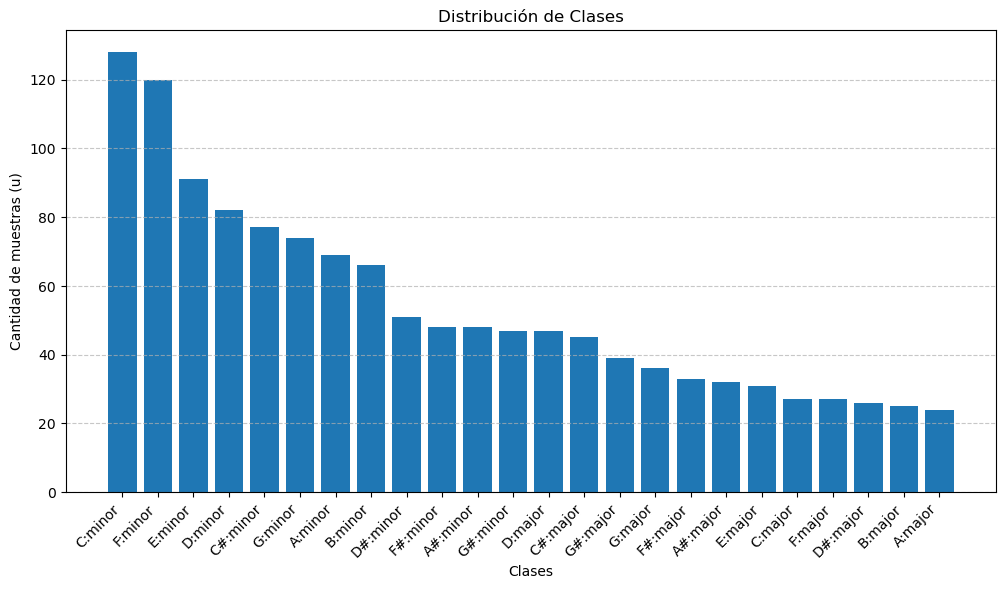

In [12]:
# Obtener conteos de cada clase
class_counts = df['key'].value_counts()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras (u)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Analizando FSL10K dataset

In [23]:
df = pd.read_csv("..//annotations//fsl10k.csv")

print(df.columns)
print(df.shape)
print(df.head(10))

Index(['file_directory', 'file_name', 'duration', 'key', 'tempo'], dtype='object')
(9486, 5)
  file_directory                file_name   duration       key  tempo
0      audio/wav   100269_1676089.wav.wav  15.737710   G:major    122
1      audio/wav   100270_1676089.wav.wav   7.868844   F:minor    122
2      audio/wav    100793_949812.wav.wav   8.571438   C:minor    112
3      audio/wav    100900_949812.wav.wav   8.571438  G#:minor    112
4      audio/wav    100901_949812.wav.wav   8.571438  G#:minor    112
5      audio/wav    100902_949812.wav.wav   8.571438   C:minor    149
6      audio/wav  101121_1657645.aiff.wav  16.000000   E:minor    120
7      audio/wav   101122_1657645.wav.wav  20.645170  F#:minor     93
8      audio/wav   101264_1569192.wav.wav   7.680000  G#:major    125
9      audio/wav    101893_401166.wav.wav  14.769229  G#:minor    130


In [24]:
print(df['key'].value_counts())
print(f"Total clases: {df['key'].nunique()}")

key
C:major     986
C:minor     820
F:minor     557
F:major     517
A:minor     494
G:major     448
G:minor     426
G#:major    410
D:minor     381
G#:minor    371
E:minor     364
B:minor     338
C#:major    325
D#:major    317
E:major     309
F#:minor    297
D:major     293
D#:minor    291
C#:minor    286
A#:minor    284
A:major     265
A#:major    253
B:major     235
F#:major    219
Name: count, dtype: int64
Total clases: 24


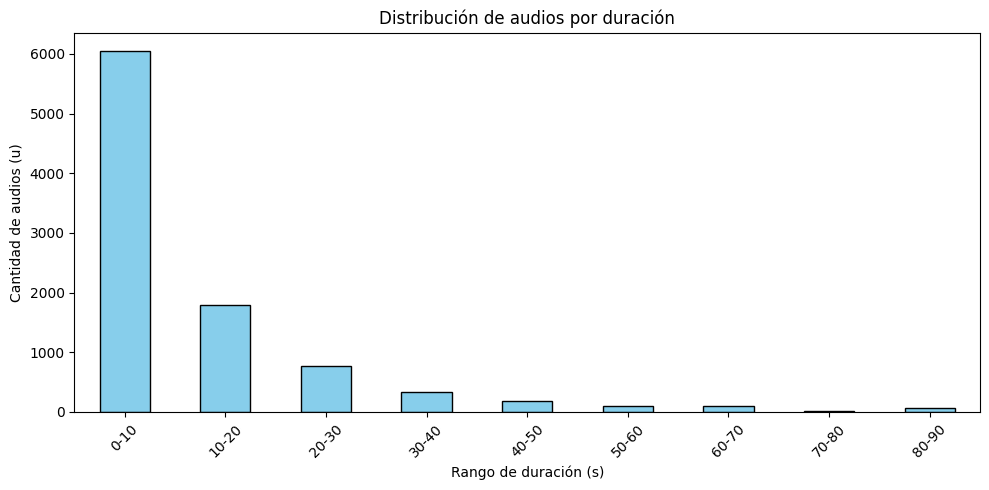

In [ ]:
bins = list(range(0, 100, 10))  # crear rangos que salten cada 10 segundos, es decir: 0-10, 10-20, ...
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Crear nueva columna con la categoría del rango
df["duration_range"] = pd.cut(df["duration"], bins=bins, labels=labels, right=False)
duration_counts = df["duration_range"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10,5))
duration_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribución de audios por duración")
plt.xlabel("Rango de duración (s)")
plt.ylabel("Cantidad de audios (u)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Filtrar datos con duración >= 10 segundos
mask = df[df["duration"] >= 10].copy()
print("Cantidad de audios con duración >= 10 segundos:", mask.shape[0])

Cantidad de audios con duración >= 10 segundos: 3437


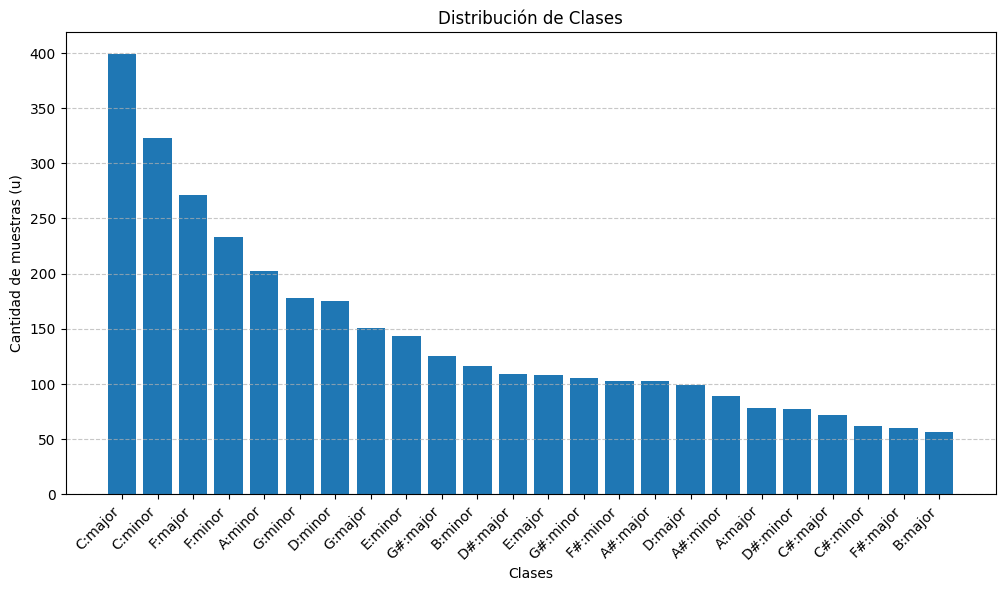

In [ ]:
# Obtener conteos de cada clase
class_counts = mask['key'].value_counts()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras (u)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Analizando Musicbench dataset

In [4]:
df = pd.read_csv("..//annotations//musicbench.csv")

print(df.columns)
print(df.shape)
print(df.head(10))

Index(['file_directory', 'file_name', 'duration', 'global_key', 'bpm'], dtype='object')
(52768, 5)
  file_directory           file_name  duration global_key    bpm
0      data_aug2   -0SdAVK79lg_1.wav  0.540040    E:major  112.0
1      data_aug2   -0SdAVK79lg_2.wav  0.448595    E:major  157.0
2      data_aug2   -0SdAVK79lg_3.wav  0.386131    E:major  151.0
3      data_aug2   -0SdAVK79lg_4.wav  0.338099    E:major  148.0
4      data_aug2   -0SdAVK79lg_5.wav  0.338099   C#:major  130.0
5      data_aug2   -0SdAVK79lg_6.wav  0.338099    D:major  130.0
6      data_aug2   -0SdAVK79lg_7.wav  0.338099   D#:major  130.0
7      data_aug2   -0SdAVK79lg_8.wav  0.338099    F:major  130.0
8      data_aug2   -0SdAVK79lg_9.wav  0.338099   F#:major  130.0
9      data_aug2  -0SdAVK79lg_10.wav  0.338099    G:major  130.0


In [5]:
print(df['global_key'].value_counts())
print(f"Total clases: {df['global_key'].nunique()}")

global_key
A:minor     3302
G:major     3165
C:major     3061
A:major     2883
D:major     2803
D:minor     2559
A#:major    2401
G:minor     2378
F:major     2328
C:minor     2289
E:minor     2285
E:major     2206
B:minor     1961
G#:major    1902
D#:major    1897
F:minor     1869
B:major     1861
F#:minor    1792
C#:major    1754
A#:minor    1651
G#:minor    1633
F#:major    1617
D#:minor    1589
C#:minor    1582
Name: count, dtype: int64
Total clases: 24


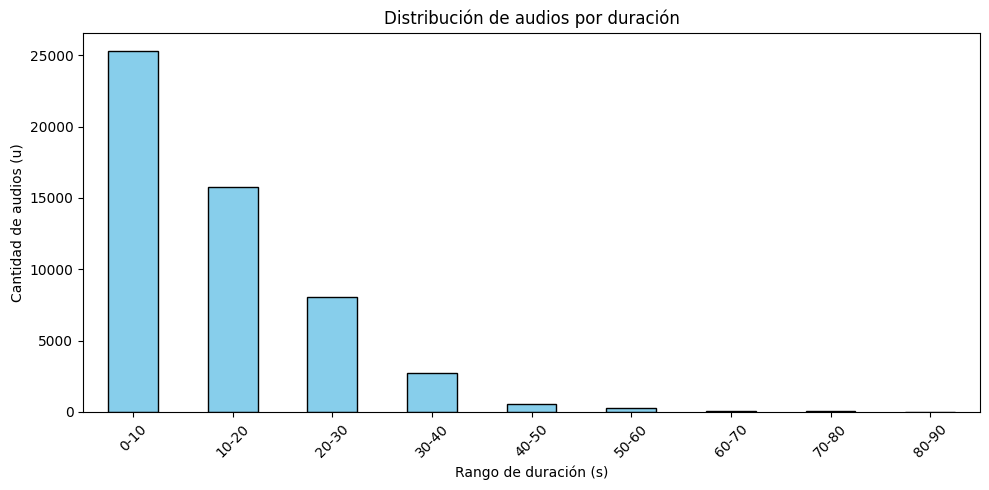

In [ ]:
bins = list(range(0, 100, 10))  # crear rangos que salten cada 10 segundos, es decir: 0-10, 10-20, ...
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Crear nueva columna con la categoría del rango
df["duration_range"] = pd.cut(df["duration"], bins=bins, labels=labels, right=False)
duration_counts = df["duration_range"].value_counts().sort_index()

# Graficar
plt.figure(figsize=(10,5))
duration_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribución de audios por duración")
plt.xlabel("Rango de duración (s)")
plt.ylabel("Cantidad de audios (u)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Filtrar datos con duración >= 10 segundos
mask = df[df["duration"] >= 10].copy()
print("Cantidad de audios con duración >= 10 segundos:", mask.shape[0])

Cantidad de audios con duración >= 10 segundos: 27464


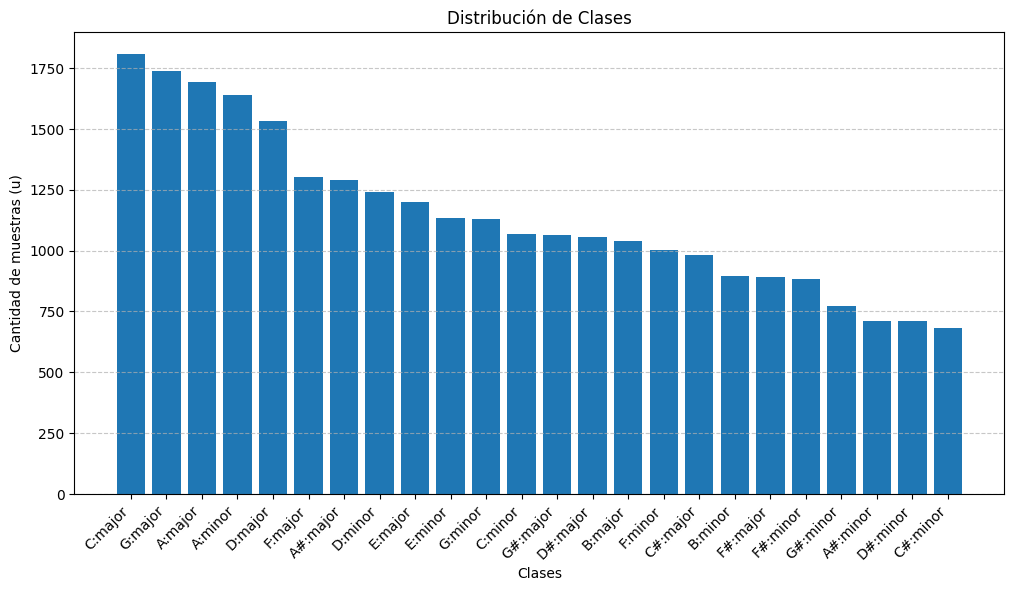

In [21]:
# Obtener conteos de cada clase
class_counts = mask['global_key'].value_counts()

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de muestras (u)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Procesar datasets

In [9]:
# Importar todos los datasets
df1 = pd.read_csv("..//annotations//fsl10k.csv")
df2 = pd.read_csv("..//annotations//musicbench.csv")
df2 = df2.rename(columns={"global_key": "key"})

In [10]:
# Filtrar FLS10K con audios con duración mayor o igual a 10 segundos
df1_mod = df1[df1["duration"] >= 10].copy()

print(df1_mod.head(10))
print(f"Cantidad de filas filtradas: {len(df1_mod)}")

    file_directory                file_name   duration       key  tempo
0        audio/wav   100269_1676089.wav.wav  15.737710   G:major    122
6        audio/wav  101121_1657645.aiff.wav  16.000000   E:minor    120
7        audio/wav   101122_1657645.wav.wav  20.645170  F#:minor     93
9        audio/wav    101893_401166.wav.wav  14.769229  G#:minor    130
12       audio/wav    101896_401166.wav.wav  16.615396  D#:major    129
28       audio/wav    101912_401166.wav.wav  14.769229  D#:major     65
41       audio/wav    102010_401166.wav.wav  19.636375  G#:minor    110
44       audio/wav    102013_401166.wav.wav  17.454542  D#:major    110
56       audio/wav    102025_401166.wav.wav  15.198083  G#:minor    111
204      audio/wav   102883_1676089.wav.wav  16.134489   F:minor    119
Cantidad de filas filtradas: 3437


In [11]:
# Filtrar MusicBench con audios con duración mayor o igual a 10 segundos
df2_mod = df2[df2["duration"] >= 10].copy()

print(df2_mod.head(10))
print(f"Cantidad de filas filtradas: {len(df2_mod)}")

   file_directory           file_name   duration       key    bpm
11      data_aug2   -0vPFx-wRRI_1.wav  15.794805   A:minor  209.0
12      data_aug2   -0vPFx-wRRI_2.wav  18.364446   A:minor  146.0
13      data_aug2   -0vPFx-wRRI_3.wav  15.774686   A:minor  198.0
14      data_aug2   -0vPFx-wRRI_4.wav  13.228810   A:minor  203.0
15      data_aug2   -0vPFx-wRRI_5.wav  13.228810  F#:minor  170.0
16      data_aug2   -0vPFx-wRRI_6.wav  13.228810   G:minor  170.0
17      data_aug2   -0vPFx-wRRI_7.wav  13.228810  G#:minor  170.0
18      data_aug2   -0vPFx-wRRI_8.wav  13.228810  A#:minor  170.0
19      data_aug2   -0vPFx-wRRI_9.wav  13.228810   B:minor  170.0
20      data_aug2  -0vPFx-wRRI_10.wav  13.228810   C:minor  170.0
Cantidad de filas filtradas: 27464


In [12]:
# Exportar dataset grandes filtrados
df_temp1 = df1_mod.copy()
df_temp1["dataset"] = "fsl10k"
df_temp1 = df_temp1[["dataset", "file_directory", "file_name", "key", "duration"]]
df_temp1.to_csv('..//annotations//benchmark_fsl10k.csv', index=False)

df_temp2 = df2_mod.copy()
df_temp2["dataset"] = "musicbench"
df_temp2 = df_temp2[["dataset", "file_directory", "file_name", "key", "duration"]]
df_temp2.to_csv('..//annotations//benchmark_musicbench.csv', index=False)

print(df_temp1.shape)
print(df_temp2.shape)

(3437, 5)
(27464, 5)
